## 1. Work to improve the model performance for the diabetes decision tree we created in class. You should be able to improve the precision and recall to be above .8 and .7 respectively. You can improve the preprocessing OR alter the model itself.

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
import pydotplus

from IPython.display import Image


In [2]:
diabetes_df = pd.read_csv("../week_13/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome',axis=1)
y = diabetes_df['Outcome']

#split into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

#Standardize
sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler =  sc.fit_transform(X_test)

## Changing parameters in the model to improve performance
      
    - max_depth = 10,random_state=42,criterion='entropy',min_samples_split=50
        - precision and recall improved to 0.83 and 0.86 respectively  
    -  max_depth = 6,random_state=42
        - precision and recall improved to 0.82 and 0.84 respectively
    - criterion= 'gini',max_depth= 6,min_samples_leaf= 3,min_samples_split= 12
        - precision and recall improved to 0.82 and 0.85 respectively
    

In [4]:
#Decision tree classifier
#model = tree.DecisionTreeClassifier(max_depth=6, random_state=42,criterion='entropy',min_samples_split=50)
#model =  tree.DecisionTreeClassifier(max_depth=6, random_state=42)

In [5]:
model=tree.DecisionTreeClassifier(criterion= 'gini',max_depth= 6,min_samples_leaf= 3,min_samples_split= 12)

In [6]:
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [7]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[85 15]
 [19 35]]


In [8]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       100
           1       0.70      0.65      0.67        54

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



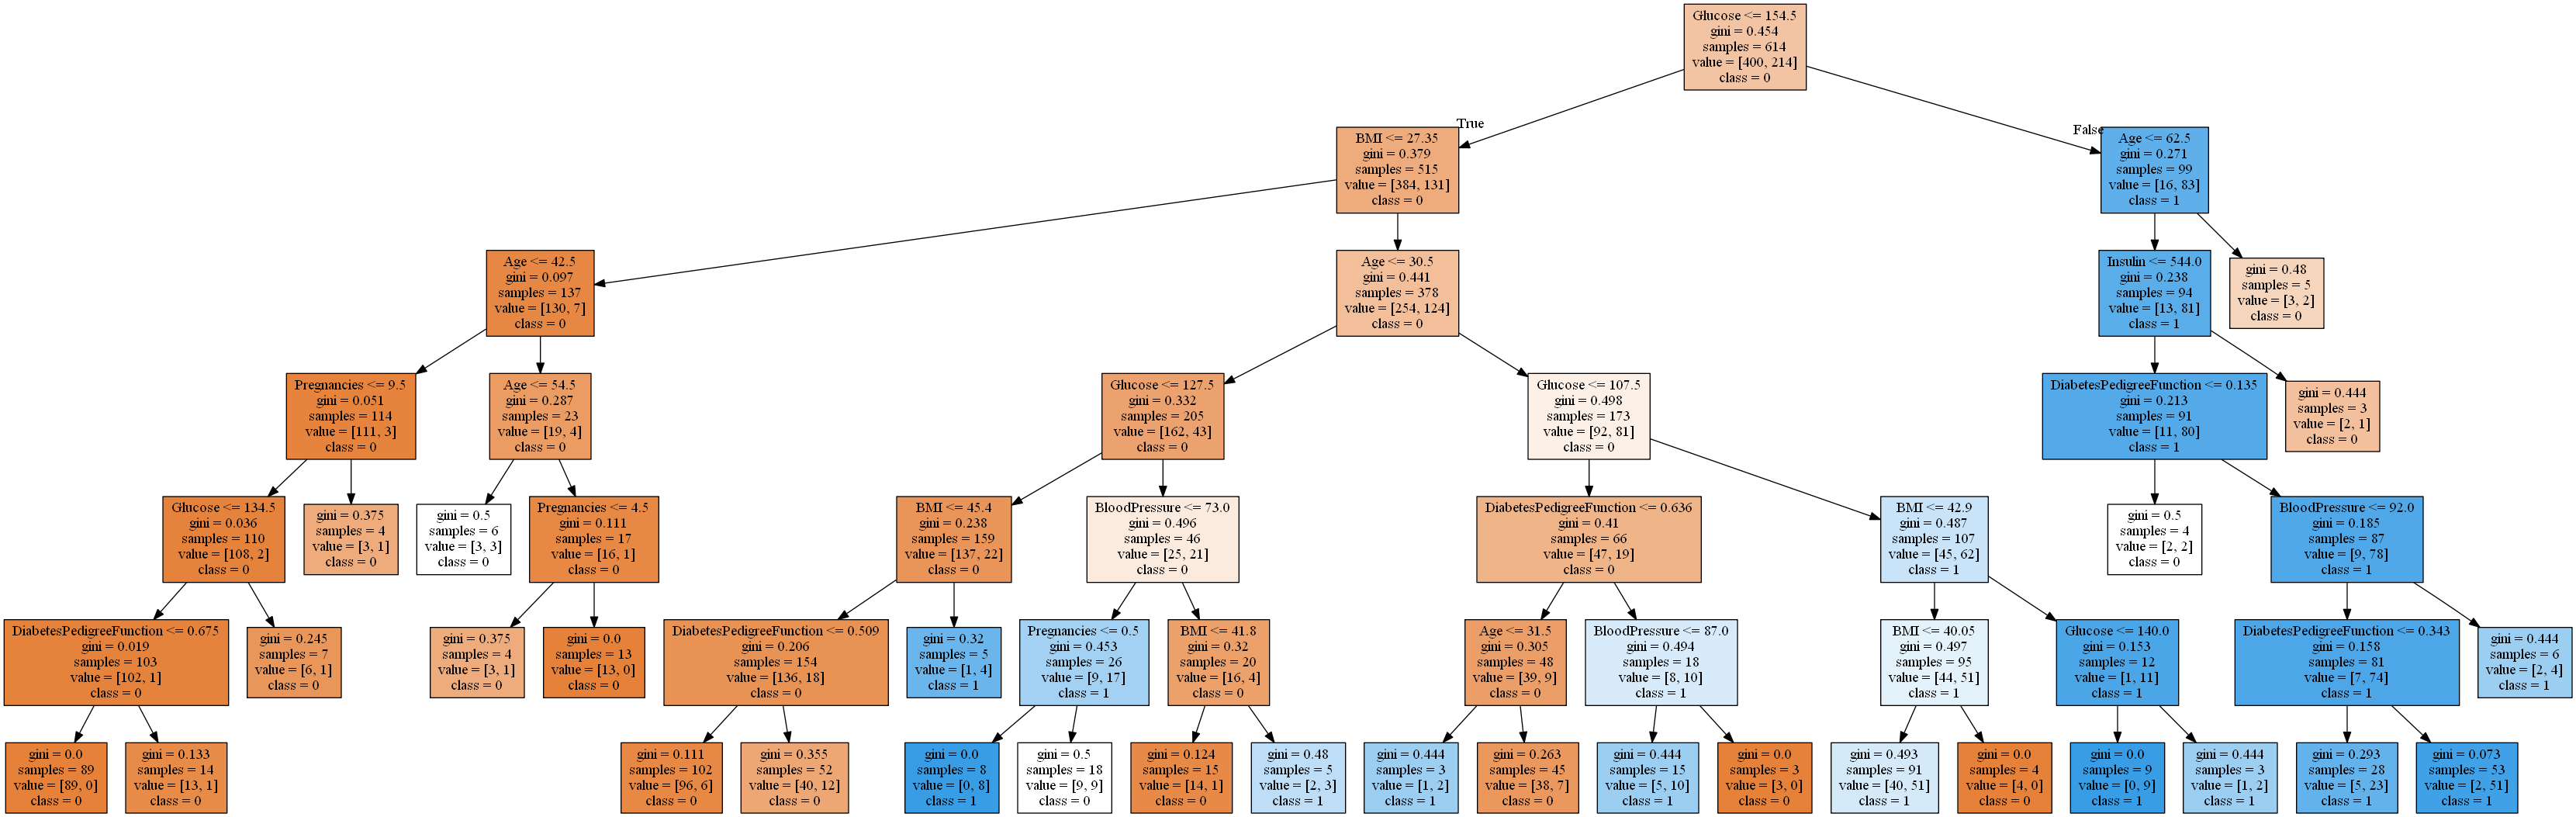

In [9]:
dot_data = tree.export_graphviz(model,out_file=None,feature_names=X.columns,class_names=["0","1"],filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## 2. Create a function that accepts an array of names and returns a string formatted as a list of names separated by commas EXCEPT for the last two names, which are separated by an ampersand (and sign - &)

- Example input:
    - [ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ]

- Example output:
    - Nichole, Tanisha & Maggie

In [17]:
def get_commaSeparatedNames(names):
    comma_separated_name = names[0]['name']
    length = len(names)
    if length>1:
        for i in range(1,length-1):
             comma_separated_name = comma_separated_name + ", " + names[i]['name']

        comma_separated_name = comma_separated_name + " & " +  names[length-1]['name']   
    print(comma_separated_name)


In [18]:
name_list1 = [ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'}]
print(type(name_list1))

<class 'list'>


In [19]:
name_list2 = [ {'name': 'Nichole'}, {'name': 'Tanisha'}]
name_list3 = [ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} , {'name': 'Roopa'},{'name': 'Kristen'} ]
name_list4 = [ {'name': 'Nichole'}]
get_commaSeparatedNames(name_list1)
get_commaSeparatedNames(name_list2)
get_commaSeparatedNames(name_list3)
get_commaSeparatedNames(name_list4)

Nichole, Tanisha & Maggie
Nichole & Tanisha
Nichole, Tanisha, Maggie, Roopa & Kristen
Nichole
